In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os

# Download Dataset

In [ ]:
! pip install kaggle

In [ ]:
!kaggle datasets download -d shubham7169/indian-dance-classification

In [2]:
! unzip -qq indian-dance-classification.zip -d Indian_dance

In [8]:
os.listdir('Indian_dance/Indian_Dance/train')

['kathakali',
 'bharatanatyam',
 'kathak',
 'sattriya',
 'kuchipudi',
 'mohiniyattam',
 'odissi',
 'manipuri']

# Install Monk

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [ ]:
# If using Colab install using the commands below
! cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#! cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#! cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

# Used trained classifier for demo

In [9]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [ ]:
# Download trained weights

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1BPPRQlRlQf9W0eYnK_YWS_OumGetvbE6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1BPPRQlRlQf9W0eYnK_YWS_OumGetvbE6" -O cls_dance_form_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq cls_dance_form_trained.zip

In [ ]:
ls workspace/Dance_Form/

In [10]:
# Gluon project
from gluon_prototype import prototype

In [11]:
gtf = prototype(verbose=1);
gtf.Prototype("Dance_Form", "Using-resnet152_v1", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Dance_Form/Using-resnet152_v1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Dance_Form
    Experiment: Using-resnet152_v1
    Dir: /home/ubuntu/workspace/Dance_Form/Using-resnet152_v1/



In [ ]:
#Infer

Prediction
    Image name:         Indian_dance/Indian_Dance/test/108.jpg
    Predicted class:      manipuri
    Predicted score:      11.944537162780762



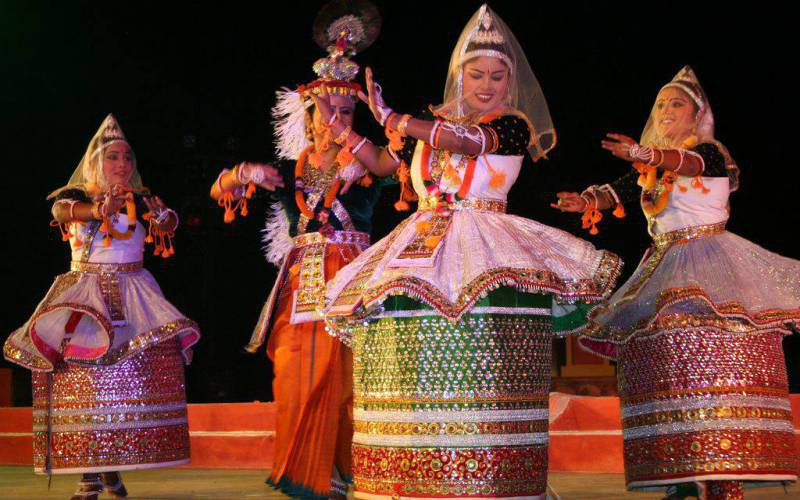

In [13]:
img_name = "Indian_dance/Indian_Dance/test/108.jpg" 
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         Indian_dance/Indian_Dance/test/217.jpg
    Predicted class:      kathakali
    Predicted score:      8.962284088134766



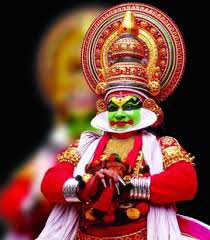

In [15]:
img_name = "Indian_dance/Indian_Dance/test/217.jpg" 
predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name)

# First Approach

In [ ]:
# Using mxnet-gluon backend 
from gluon_prototype import prototype

# For pytorch backend
#from pytorch_prototype import prototype

# For Keras backend
#from keras_prototype import prototype

In [ ]:
# Create Project and Experiment
gtf = prototype(verbose=1);
gtf.Prototype("Dance_Form", "Using-resnet152_v1");

In [ ]:
gtf.Default(dataset_path="../input/final3/folder/", 
            model_name="resnet152_v1", 
            freeze_base_network=False,
            num_epochs=10);

In [ ]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

# Run on test Images for submission

In [ ]:
list_test=os.listdir("../input/data-test/test/");
from tqdm.notebook import tqdm
combined = [];
for i in tqdm(range(len(list_test))):
    img_name = "../input/data-test/test/" + list_test[i];
    predictions = gtf.Infer(img_name=img_name);
    id_ = list_test[i]
    label = predictions["predicted_class"];    
    combined.append([id_, label]);

In [ ]:
a = pd.DataFrame(combined, columns = ['Image', 'target']);
a.to_csv("submission.csv", index=False);

In [ ]:
# Submit csv file for evaluation

# Second Approach

## For Data augmentation
One can also apply each data augmentation seperately.

In [ ]:
from imgaug import augmenters as iaa
import imgaug as ia
import imageio
seq=iaa.Sequential([
        iaa.Scale((224, 224)),
        iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
        iaa.Fliplr(0.5),
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),
        iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        iaa.Sometimes(0.25,
                      iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
                                 iaa.CoarseDropout(0.1, size_percent=0.5)])),
        iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])

## Saving the augmented images

In [ ]:
# Path where you want to save images with the original images
path='/data/folder/'

In [ ]:
for folder in os.listdir(path):
    i = 0
    for fname in os.listdir(path + '/' + folder):
        img = imageio.imread(path + '/' + folder + '/' + fname)
        print('Original:')
        ia.imshow(img)
        img_aug = seq.augment_image(img)
        print('Augmented:')
        ia.imshow(img_aug)
        
        imageio.imwrite(os.path.join(path, path + '/' + folder + '/' + folder + "%06d.jpg" % (i,)), img_aug)
        i += 1

In [ ]:
# Using mxnet-gluon backend 
from gluon_prototype import prototype

# For pytorch backend
#from pytorch_prototype import prototype

# For Keras backend
#from keras_prototype import prototype

In [ ]:
# Create Project and Experiment
gtf = prototype(verbose=1);
gtf.Prototype("Dance_Form", "Using-resnet152_v1");

In [ ]:
gtf.Default(dataset_path="../input/final3/folder/", 
            model_name="resnet152_v1", 
            freeze_base_network=False,
            num_epochs=10);

In [ ]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

# Run on test Images for submission

In [ ]:
list_test=os.listdir("../input/data-test/test/");
from tqdm.notebook import tqdm
combined = [];
for i in tqdm(range(len(list_test))):
    img_name = "../input/data-test/test/" + list_test[i];
    predictions = gtf.Infer(img_name=img_name);
    id_ = list_test[i]
    label = predictions["predicted_class"];    
    combined.append([id_, label]);

In [ ]:
a = pd.DataFrame(combined, columns = ['Image', 'target']);
a.to_csv("submission.csv", index=False);

In [ ]:
# Submit csv file for evaluation